range(0, 10)


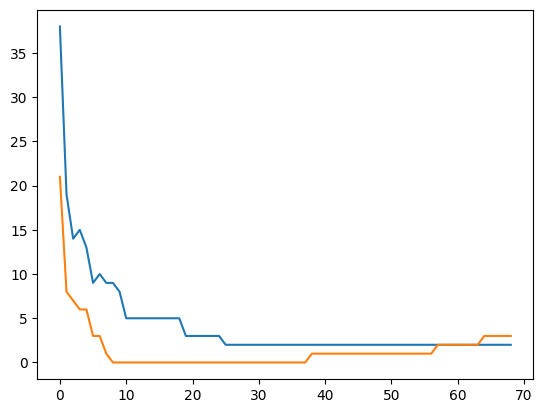

In [28]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


m_train=250
svm_kernel='poly'

df=pandas.read_csv('alcohol_dataset.csv')
data=np.array(df)

m_all=np.shape(data)[0]
d=np.shape(data)[1]-1
m_test=m_all-m_train
data[:,d]=np.where(data[:,d]==0,-1,data[:,d])

x_mean=np.mean(data[:,:d],axis=0)
x_std=np.std(data[:,:d],axis=0,ddof=0)
data[:,:d]=(data[:,:d]-x_mean)/x_std
rng=np.random.default_rng(1)
rng.shuffle(data)
x_train=data[:m_train,:d]
x_test=data[m_train:,:d]
y_train=data[:m_train,d]
y_test=data[m_train:,d]

C_train_saved=[]
C_test_saved=[]
for C_1 in np.arange(0.1,7,0.1):
    clf=svm.SVC(kernel=svm_kernel,C=C_1)
    clf.fit(x_train,y_train)
    y_train_hat=clf.predict(x_train)
    y_test_hat=clf.predict(x_test)
    train_false=np.sum(y_train!=y_train_hat)
    test_false=np.sum(y_test_hat!=y_test)
    C_train_saved.append(train_false)
    C_test_saved.append(test_false)
plt.plot(range(0,len(C_train_saved)),C_train_saved)
plt.plot(range(0,len(C_test_saved)),C_test_saved)
plt.show()
